 코렙에서 한글 사용

In [20]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

'apt'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [21]:
!pip install mglearn    # 시각화

# 지도학습 - K-Nearest Neighbors (K-NN)

지도 학습 (Supervised Learning)
- 데이터에 대한 Label(명시적인 답)이 주어진 상태에서 컴퓨터를 학습시키는 방법. 

비지도 학습 (Unsupervised Learning)
- 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법.
- 데이터의 숨겨진 특성이나 구조를 파악하는데 사용.


분류 (Classification)
- 미리 정의된 여러 클래스 레이블 중 하나를 예측하는 것.
- 속성 값을 입력, 클래스 값을 출력으로 하는 모델
- 붓꽃(iris)의 세 품종 중 하나로 분류, 암 분류 등. 
- 이진분류, 다중 분류 등이 있다.


회귀 (Regression)
- 연속적인 숫자를 예측하는 것.
- 속성 값을 입력, 연속적인 실수 값을 출력으로 하는 모델
- 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득 예측. 
- 예측 값의 미묘한 차이가 크게 중요하지 않다.

일반화, 과대적합, 과소적합

일반화 (Generalization)
- 훈련 세트로 학습한 모델이 테스트 세트에 대해 정확히 예측 하도록 하는 것 .

과대적합 (Overfitting)
- 훈련 세트에 너무 맞추어져 있어 테스트 세트의 성능 저하.

과소적합 (Underfitting)
- 훈련 세트를 충분히 반영하지 못해 훈련 세트, 테스트 세트에서 모두 성능이 저하.


<center>
 <img src="https://image.slidesharecdn.com/2-171030145527/95/2supervised-learningepoch21-9-1024.jpg?cb=1509375471" alt="과대적합" width="40%" />

</center>

<center>
 <img src="https://image.slidesharecdn.com/2-171030145527/95/2supervised-learningepoch21-10-1024.jpg?cb=1509375471" alt="과소적합" width="60%" />

</center>

***일반화 성능이 최대화 되는 모델을 찾는 것이 목표***

과대적합 (Overfitting)
- 너무 상세하고 복잡한 모델링을 하여 (열의 개수가 너무 많을 때) 훈련데이터에만 과도하게 정확히 동작하는 모델.

과소적합 (Underfitting)
- 모델링을 너무 간단하게 하여 성능이 제대로 나오지 않는 모델. (조건이 너무 간단 할 때)


모델 복잡도 곡선

<center>
 <img src="https://tensorflowkorea.files.wordpress.com/2017/06/fig2-01.png" alt="모델 복잡도 곡선" width="60%" />

</center>

- 일반화 곡선 



해결방법

- 주어진 훈련데이터의 다양성이 보장되어야 한다 (다양한 데이터포인트를 골고루 나타내야 한다)
- 일반적으로 데이터 양이 많으면 일반화에 도움이 된다.
- 그러나 편중된 데이터를 많이 모으는 것은 도움이 되지 않는다.
- 규제(Regularization)을 통해 모델의 복잡도를 적정선으로 설정한다.


# K-Nearest Neighbors (K-NN)


k-최근접 이웃 알고리즘

- 새로운 데이터 포인트와 가장 가까운 훈련 데이터셋의 데이터  포인트를 찾아 예측
- k 값에 따라 가까운 이웃의 수가 결정
- 분류와 회귀에 모두 사용 가능


- 입력 값과 k개의 가까운 점이 있다고 가정할 때 그 점들이 어떤 라벨과 가장 비슷한지 (최 근접 이웃)
판단하는 알고리즘

- 매개 변수 : 데이터 포인트 사이의 거리를 재는 방법 (일반적으로 유클리디안 거리 사용), 이웃의 수
 - 장점 : 이해하기 쉬운 모델, 약간의 조정으로 좋은 성능
 - 단점 : 훈련 세트가 크면 속도가 느림, 많은 특성을 처리하기 힘듬

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


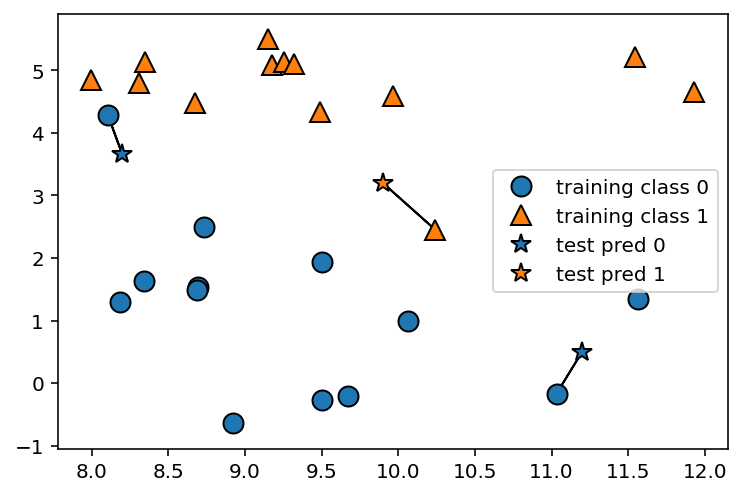

In [22]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


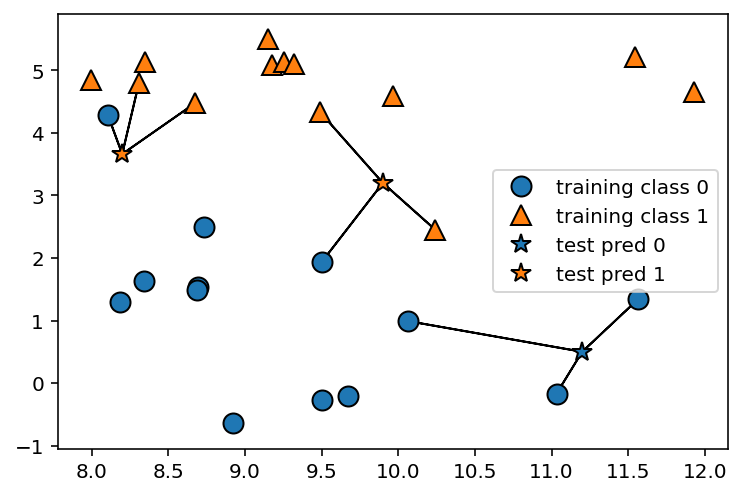

In [23]:
# 이웃 수를 늘렸을 때? : 애매한 선상에 있는 데이터들은 예측 결과값이 달라질 수 있다.
# 값을 결정하는 선을 결정 경게라고 말한다.

mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


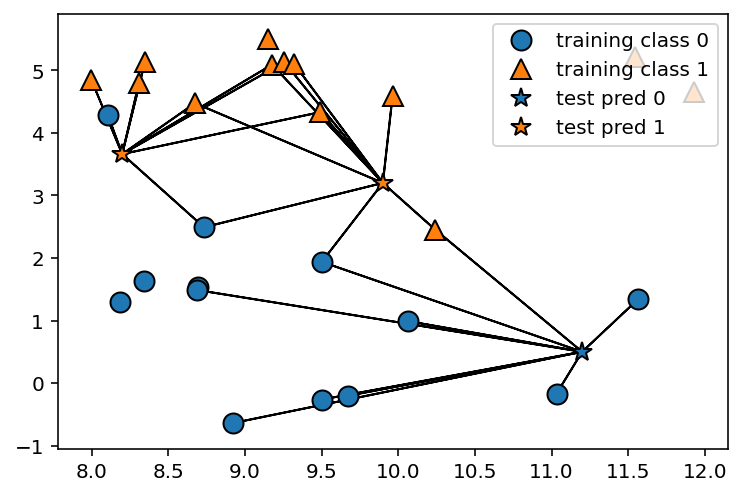

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=9)

이진분류는 홀수개로 한다. 짝수개로 만들면 첫번째 분류로 답이 결정되기 때문.

<center>
 <img src="https://tensorflowkorea.files.wordpress.com/2017/06/2-4.png?w=625" alt="1-최근접 이웃 모델" width="60%" />

1-최근접 이웃 모델

 <img src="https://tensorflowkorea.files.wordpress.com/2017/06/2-5.png?w=768" alt="3-최근접 이웃 모델" width="60%" />

 3-최근접 이웃 모델

</center>


- k 값이 작을 수록 모델의 복잡도가 상대적으로 증가.
    (noise 값에 민감)
- 반대로 k 값이 많아질수록 모델의 복잡도가 낮아진다.
- 100개의 데이터를 학습하고 k를 100개로 설정하여 예측하면 빈도가 가장 많은 클래스 레이블로 분류

- 이상치 데이터는 이웃이/거리가 많아질 수록 소멸된다. (다양한 분류를 확인해야 하기 때문)


앵그리버드는 팽귄? or 닭?

<center>
 <img src="https://t1.daumcdn.net/cfile/tistory/110188344CEB80083A" alt="앵그리버드 팽귄 닭" width="60%" />
 <br>
왼쪽이 펭귄이고 오른쪽이 닭일 때 펭귄쪽에 더 가깝기 때문에 KNN으로 분류하면 펭귄?

</center>


유클리디안 거리 (Euclidean distance) : 두 점사이의 거리를 계산할 때 쓰이는 방법
- 두 점 (p1, p2, ...)와 (q1, q2, ....)의 거리


유클리디안 거리 공식

 <img src="https://wikidocs.net/images/page/24654/2%EC%B0%A8%EC%9B%90_%ED%8F%89%EB%A9%B4.png" alt="유클리디안 거리" width="60%" />

</center>

KNeighborsClassifier()
```
KNeighborsClassifier(n_neighbors, weights, algorithm, leaf_size, p, metric, metric_params, n_jobs)
```
- n_neighbors : 이웃의 수 (default : 5)
- weights : 예측에 사용된 가중 함수 (uniform, distance) (default : uniform)
    - 회귀로 쓸 때만 필요. 분류에서는 많이 필요하지 않다.
- algorithm : 가까운 이웃을 계산하는데 사용되는 알고리즘 (auto, ball_tree, kd_tree, brute)
- leaf_size : BallTree 또는 KDTree에 전달 된 리프 크기
- p : (1 : minkowski_distance, 2: manhattan_distance 및 euclidean_distance)
- metric : 트리에 사용하는 거리 메트릭스
- metric_params : 메트릭 함수에 대한 추가 키워드 인수
- n_jobs : 이웃 검색을 위해 실행할 병렬 작업 수
    - CPU -> GPU처럼 병렬처리하기 때문에 속도가 빨라지긴 한다. 

KNeighborsClassifier 모델은 k-최근접 이웃 분류 또는 KNN이라고 합니다. <br>
k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 K개를 최근접 이웃으로 찾아 예측에 사용합니다. <br>
n_neighbors=1 는 1개를 최근접 이웃으로 하겠다는 것입니다.

주요 매개변수(Hyperparameter)
- 거리측정 방법, 이웃의 수, 가중치 함수 

scikit-learn의 params name
- metric  :  유클리디언 거리 방식
- k : 이웃의 수
- weight  : 가중치 함수
     -  uniform : 가중치를 동등하게 설정.
     -  distance :  가중치를 거리에 반비례하도록 설정


장단점
- 이해하기 매우 쉬운 모델
- 훈련 데이터 세트가 크면(특성,샘플의 수) 예측이 느려진다
- 수백 개 이상의 많은 특성을 가진 데이터 세트와 특성 값 대부분이 0인 희소(sparse)한 데이터 세트에는 잘 동작하지 않는다
- 거리를 측정하기 때문에 같은 scale을 같도록 정규화 필요


##### weight 가중치 함수 추가설명

예를 들어 
```
영화 : A -> 등급: 5.0 , X까지의 거리: 3.2
영화 : B -> 등급: 6.8 , X까지의 거리: 11.5
영화 : C -> 등급: 9.0 , X까지의 거리: 1.1
```
가 있다고 할 때 

평균을 구하면
> (5.0 + 6.8 + 9.0) / 3 = 6.93

거리에 대한 가중 평균을 구해보면
> (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) = 7.9

code
```
print( (5.0 + 6.8 + 9.0) / 3 )
print( (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) )
출력
6.933333333333334
7.898546346988861
```

## iris 데이터를 이용한 KNN 분류 실습

붓꽃 데이터 셋
- 클래스 (class) : 출력될 수 있는 값 (붓꽃의 종류)
- 레이블 (label) : 특정 데이터 포인트에 대한 출력

<center>
 <img src="https://tensorflowkorea.files.wordpress.com/2017/06/1-2.png" alt="붓꽃" width="30%" />

</center>

붓꽃 (Iris)의 품종 분류

<center>
 <img src="https://thegoodpython.com/assets/images/iris-species.png" alt="붓꽃 품종" width="60%" />

</center>

데이터셋 구성
- 150개의 데이터
- 4개의 정보와 1개의 클래스(3개의 품종)로 구성

| sepal_length|	sepal_width|	petal_length|	petal_width|	species|
|---|---|---|---|---|
| 꽃받침 길이| 꽃받침 넓이| 꽃잎 길이| 꽃잎 넓이| 품종|


### 사이킷 런 이용

In [25]:
# 데이터 가져오기
from sklearn.datasets import load_iris
import sklearn.datasets 

iris_dataset = load_iris()
type(iris_dataset)      # sklearn.utils.Bunch : dictionary 같은 타입

sklearn.utils.Bunch

In [26]:
# bunch type은 key가 있다.

iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

- data : x
- feature_names : x의 분류명
    - feature, attribute, label, column
- target : y 
- target_names : y의 분류명
- DESCR : description
    - bunch type의 특수한 key로, 데이터에 대한 설명이 나와있다.

In [27]:
print(iris_dataset['DESCR'])   # 그냥 호출하면 불편하니 print를 통해 출력하는것이 낫다.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [28]:
print(iris_dataset.target_names)
print(iris_dataset.target)      # 정렬되어있으므로 shuffle을 통해 데이터를 적당히 섞어야 한다.

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [29]:
# 데이터의 타입?

print(type(iris_dataset.target))        # ndarray

<class 'numpy.ndarray'>


In [30]:
# 모양 확인

print(iris_dataset.target.shape)        # 150개의 1차원 데이터 : (150,)
print(iris_dataset.data.shape)          # 150개의 4차원 데이터 : (150, 4)

# df로 변경할 수 있다.

(150,)
(150, 4)


In [31]:
print( iris.data[:3] )

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


훈련 세트(training set) <br>
테스트 세트(test set), 홀드아웃 세트(hold-out set)

In [32]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X = iris_dataset.data
y = iris_dataset.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)       # 내부에 numpy가 있어서 딥러닝과 같은 방식으로 섞는다. (동작방식 동일)
# 일반적으로 75 : 25, 데이터가 많으면 8 : 2 적으면 7 : 3

# random은 유사 난수라고 해서 난수처럼 보이는 수가 들어있다. 몇번째 난수인지(random seed)가 랜덤인거지 매번 그 수를 랜덤하게 뽑는게 아니다. 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

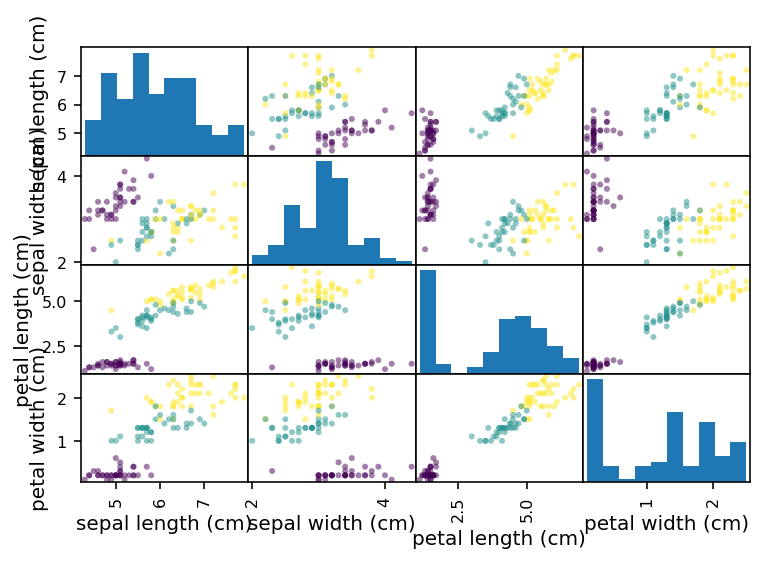

In [33]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
import pandas as pd

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train)

### seaborn 이용



In [38]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris data loading
iris = sns.load_dataset('iris')
type(iris)  # sns에도 iris가 있다.
iris.shape

(150, 5)

In [39]:
# sepal_length	sepal_width	petal_length	petal_width	species
# 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이, 품종
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


확인해보면 y값이 x와 함께 붙어있다. (sklearn은 x를 data, y를 target으로 분리하고 있음)

훈련 세트(training set) <br>
테스트 세트(test set), 홀드아웃 세트(hold-out set)

In [40]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X = iris.iloc[:, :4]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 75% : 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

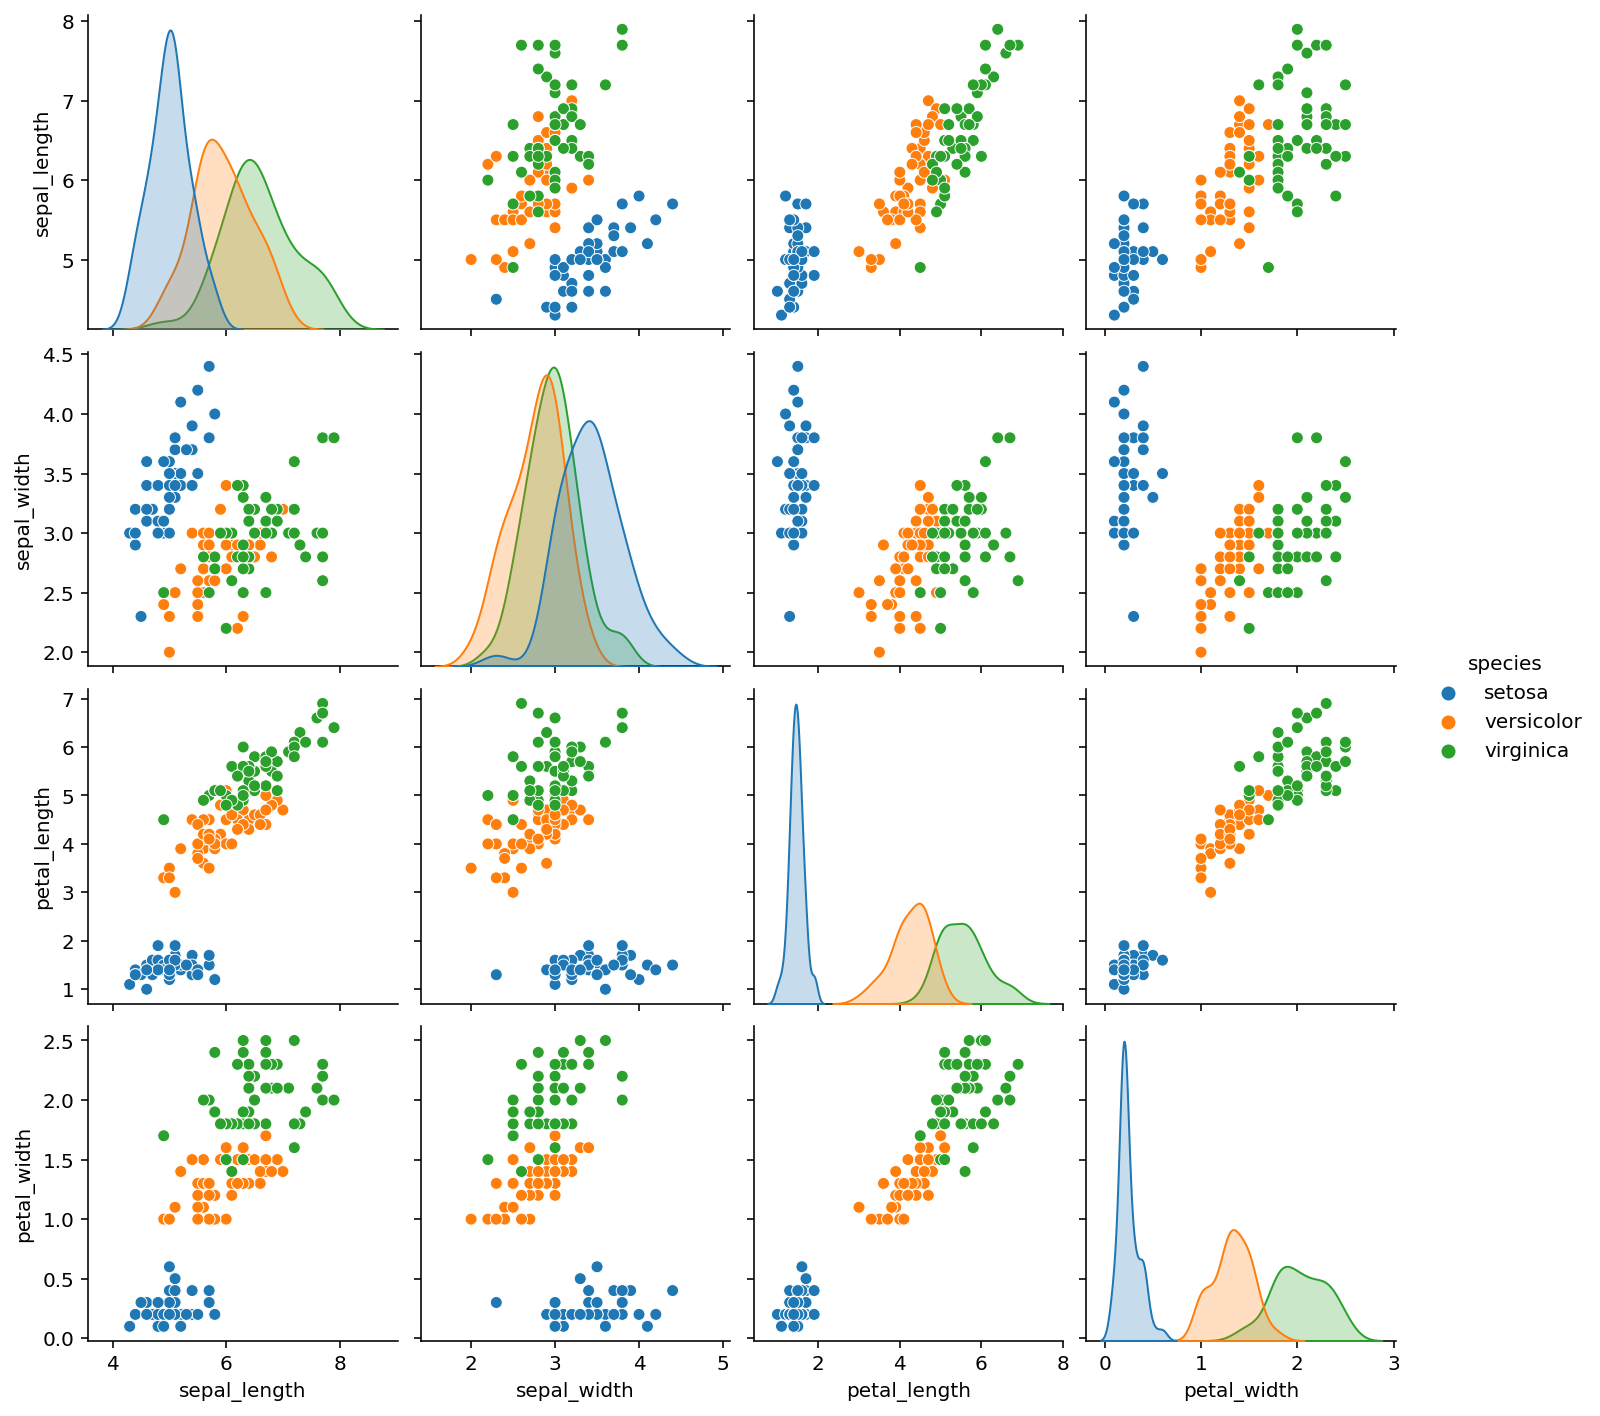

In [41]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
sns.pairplot(iris, hue='species')

### 공통

In [42]:
# 머신러닝 모델
# k-최근접 이웃 알고리즘
# 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
# 모델 평가
# 테스트 세트 이용
from sklearn import metrics

pred = model.predict(X_test)
ac_score = metrics.accuracy_score(y_test, pred)
print('정답률:', ac_score)

정답률: 0.9736842105263158


In [44]:
# 예측하기
import numpy as np

X_new = [ [5, 2.9, 1, 0.2] ]
pre = model.predict(X_new)
print('예측:', pre)

예측: ['setosa']


##### iris 데이터를 이용한 KNN 분류 실습 전체코드


In [45]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 데이터 가져오기
# iris data loading
iris = sns.load_dataset('iris')

# 훈련 데이터와 테스트 데이터 준비
# 75% : 25%
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 선택과 학습
# k-최근접 이웃 알고리즘
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
ac_score = metrics.accuracy_score(y_test, pred)
print('정답률:', ac_score)

# 예측활용
X_new = [ [5, 2.9, 1, 0.2] ]
pre = model.predict(X_new)
print('예측:', pre)

정답률: 0.9736842105263158
예측: ['setosa']


# KNeighborsClassifier 분석

### 결정경계([descision boundary](https://developers.google.com/machine-learning/glossary#%EA%B2%B0%EC%A0%95-%EA%B2%BD%EA%B3%84decision-boundary))

이웃의 수를 늘릴수록 결정경계는 더 부드러워진다.

이웃을 적게 사용하면 모델의 복잡도가 높아지고, 
많이 사용하면 복잡도는 낮아진다.

In [46]:
import platform
from matplotlib import font_manager, rc 
import matplotlib


```
# Windows
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
```

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0, flags=flags

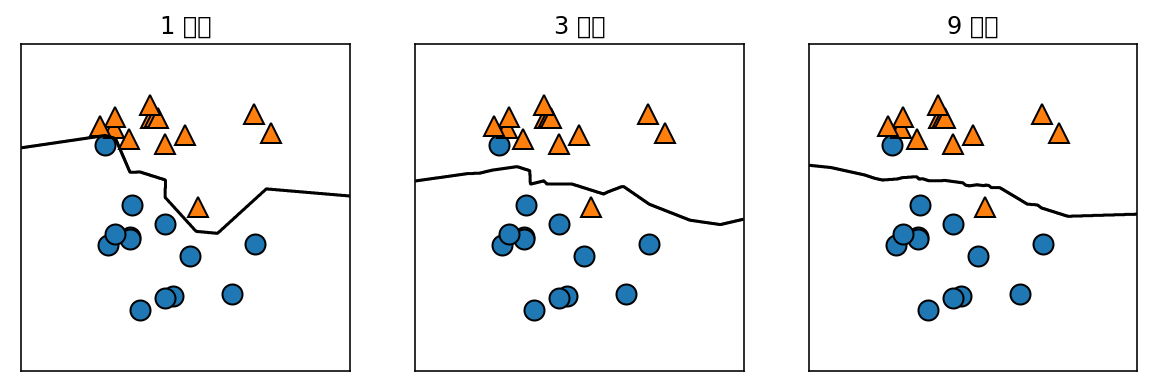

In [47]:
# KNeighborsClassifier 분석
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X, y)
  mglearn.plots.plot_2d_separator(model, X, ax=ax)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f'{n} 이웃')

#### 모델 복잡도와 일반화 사이의 관계

이웃의 수 변화에 따른 훈련 세트와 테스트 세트의 성능 변화

- 데이터셋 : wisconsin의 유방암 데이터셋
- 총 569건의 데이터로 악성(212), 양성 (357)으로 구성

<center>
 <img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99306C335A1685AA111704" alt="wisconsin의 유방암 데이터셋" width="30%" />

</center>

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print( cancer.keys() )
cancer.data.shape # 데이터의 특성 수 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


(569, 30)

In [49]:
import numpy as np

# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
  print({n:v})

{'malignant': 212}
{'benign': 357}


In [50]:
# 특성의 명칭
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [51]:
# 훈련 데이터와 테스트 데이터 분리
# stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 
# 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. 
# (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고
#  classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=0)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [52]:
t1 = np.bincount(y_train)
print( t1[1] / t1[0])
t2 = np.bincount(y_test)
print( t2[1] / t2[0])
t3 = np.bincount(cancer.target)
print( t3[1] / t3[0])

1.679245283018868
1.6981132075471699
1.6839622641509433


이웃 수가 여러개일때에 따라 달라지는 훈련 정확도와 테스트 정확도 확인

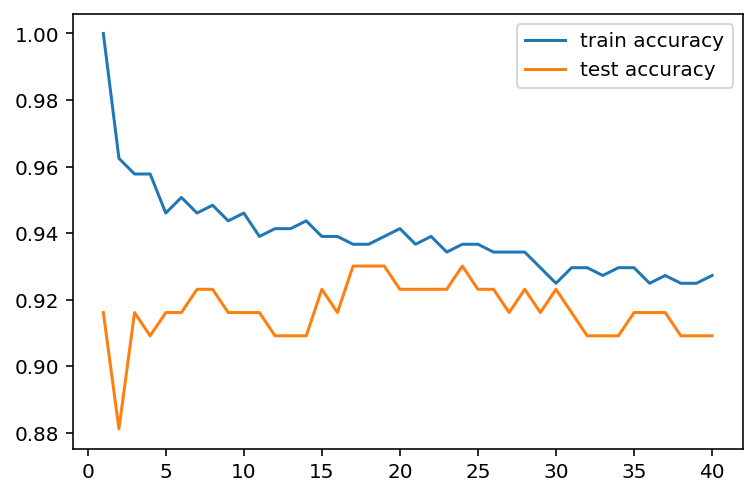

In [56]:
train_acc = []
test_acc = []

n_neighbors = range(1, 41)

for n in n_neighbors:
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X_train, y_train)
  train_acc.append( model.score(X_train, y_train) )
  test_acc.append( model.score(X_test, y_test) )

plt.plot(n_neighbors, train_acc, label='train accuracy')
plt.plot(n_neighbors, test_acc, label='test accuracy')
plt.legend()
plt.show()

여기서는 17이 적당하다.  
데이터가 많은 편이 아니라 학습 데이터(random state)에 따라 값이 많이 달라짐에 유의 할 것.  
데이터의 개수가 적을 때에는 차이가 크다.

과대적합과 과소적합의 특징을 발견 (이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태가 나타남) <br>
이웃의 수가 하나일 때 훈련 데이터에 대한 예측이 완벽하나, 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다.

정확도가 가장 좋을 때는? -> 중간정도인 6개를 사용했을 경우

# K-NN 회귀

k-NN을 회귀에 사용한 경우
- 여러 개의 최근접 이웃을 사용할 경우에는 이웃 간의 평균이 예측 <br> (**분류**에서는 이웃의 레이블 개수를 확인해서 **다수결**로 정했지만, **회귀**에서는 이웃들의 **평균을 계산**한다는 점이 차이)

> **분류는 모델과 비교하여 유사한 데이터의 개수(불연속)로 판단한다면 회귀는 데이터의 평균유사도 (연속적인)와 같은 수치로 판단**

Classification(분류)는 연속적이지 않은 레이블, 다시 말해 ‘무엇’인지를 예측하지만, 회귀(Regression)는 연속된 수치, 즉 ‘얼마나’를 예측

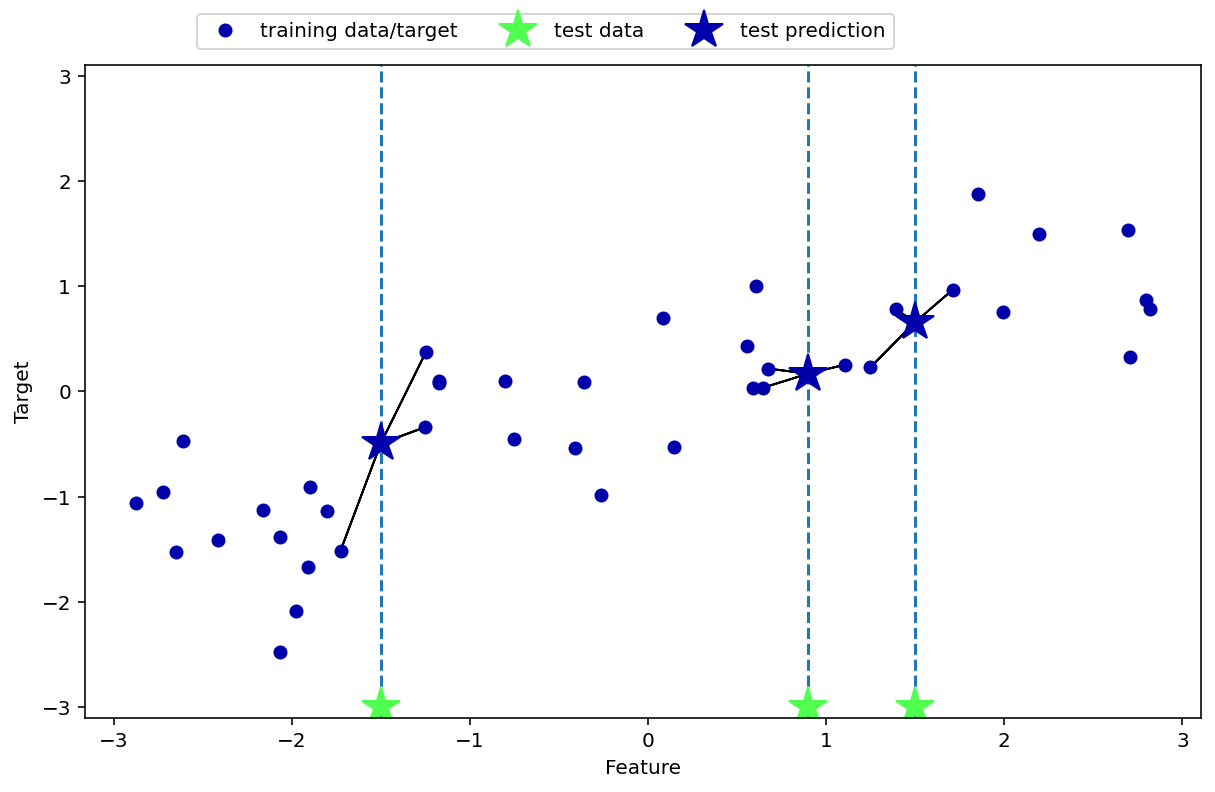

In [57]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_knn_regression(n_neighbors=3)

- 파란색 별 : 예측한 테스트 결과
- 녹색 별 : 실제 테스트 값 

-알고자 하는 것 : y축의 target 
- 알고 있는 것 : feature

**기존의 학습 데이터**가 x 축과 y 축을 모두 알고 있는 상태인 것과는 다르다.

**목표** : feature인 x축에서 가장 가까운 파란 값의 평균(파란 별)에 수직선을 그어 y값을 찾는다.
- 이 때 가장 가까운 파란 값의 개수 `==` n_neighbors=3

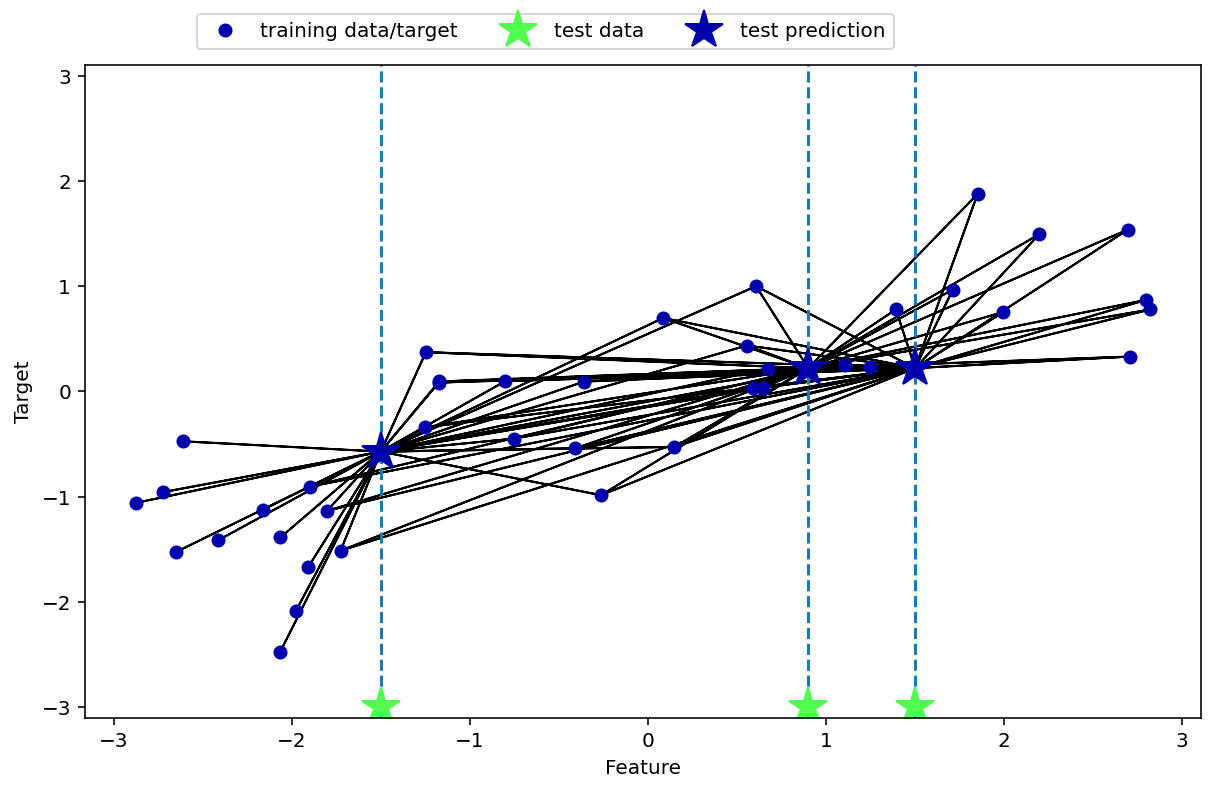

In [58]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_knn_regression(n_neighbors=30)

n_neighbors의 개수가 커져도 위치는 거의 같다. 

### KNeighborsRegressor()

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=9)

X_train, X_test, y_train, y_text = train_test_split(X, y, random_state=0)
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, y_train)

model.predict(X_test)


# 값이 수치로 나온다.

array([-0.73364368, -0.73364368, -0.73364368])

### K-NN 회귀 실습 01

IMDb 영화 데이터 세트

회귀에 대한 이야기니까 당연히 "평이 좋다" vs "평이 나쁘다" 레이블로 분류하는 게 아니라 <br>
실제 IMDb 등급(별점)을 예측하는 것이 과제의 목표

In [67]:
from sklearn.neighbors import KNeighborsRegressor

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# 영화에 대한 별점
y_train = [5.0, 6.8, 9.0]   # 0.5 0.2 0.1 -> 5.0

# 코드작성(모델)
model = KNeighborsRegressor(n_neighbors=3)    # 값이 세개뿐이므로 최대이웃의 개수도 3개 

# 새로운 영화 3건에 대해 별점을 예측
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

# 코드작성(예측)
model.fit(X_train, y_train)

model.predict(X_test)

array([6.93333333, 6.93333333, 6.93333333])

**weight 가중치 함수 추가설명**

예를 들어 
```
영화 : A -> 등급: 5.0 , X까지의 거리: 3.2
영화 : B -> 등급: 6.8 , X까지의 거리: 11.5
영화 : C -> 등급: 9.0 , X까지의 거리: 1.1
```
가 있다고 할 때 

평균을 구하면
> (5.0 + 6.8 + 9.0) / 3 = 6.93

거리에 대한 가중 평균을 구해보면
> (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) = 7.9

code
```
print( (5.0 + 6.8 + 9.0) / 3 )
print( (5.0/3.2 + 6.8/11.5 + 9.0/1.1) / (1/3.2 + 1/11.5 + 1/1.1) )
출력
6.933333333333334
7.898546346988861
```

회귀 사용할 때 값끼리의 차이가 많이 나지 않는다면 하이퍼 파라미터로 weights = 'distance' 를 추가해보자. **only in regression model**

In [68]:
from sklearn.neighbors import KNeighborsRegressor

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# 영화에 대한 별점
y_train = [5.0, 6.8, 9.0]   # 0.5 0.2 0.1 -> 5.0

# 코드작성(모델)
model = KNeighborsRegressor(n_neighbors=3, weights='distance')    # 값이 세개뿐이므로 최대이웃의 개수도 3개 

# 새로운 영화 3건에 대해 별점을 예측
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

# 코드작성(예측)
model.fit(X_train, y_train)

model.predict(X_test)

array([7.28143288, 7.76451922, 6.8457845 ])